In [1]:
import sys
import os

sys.path.append('../src/')

from read_data import DataObject
from constants import spend_categories
from visualizations import KDEPlot
from dataframe_utilities import get_filter_index, subgroup_sum, upsample

In [2]:
OVS1619 = DataObject(source = "OVS", version = "1619")
TVAE = DataObject(source = "Synthetic", version = "?", model = "TVAE")
TGAN = DataObject(source = "Synthetic", version = "?", model = "TGAN")
CTGAN = DataObject(source = "Synthetic", version = "?", model = "CTGAN")

In [9]:
import pandas as pd

# recode
recode_b10 = {0: '0 days',
              1: '1 day',
              2: '2 days',
              3: '3 days',
              4: '4 days',
              5: '5 days',
              6: '6 days',
              7: '7 days'}
# all others: greater than or equal to 8 days

recode_a4 = {3: 'American',
             25: 'Chinese',
             38: 'Emirati',
             39: 'English',
             57: 'Indian',
             65: 'Japanese',
             79: 'Malaysian',
             115: 'South Korean'}
# all others: other nationalities

def recode(input_df, colname, recode_dict, fill_label = ""):
    assert isinstance(input_df, pd.DataFrame), "Require input_df to be a pandas dataframe."
    assert colname in input_df.columns, "The column you wish to recode does not exist in input_df."
    assert isinstance(recode_dict, dict), "Require recode_dict to be specified as a dictionary."
    assert fill_label not in list(recode_dict.values()), f"'{fill_label}' is already present in the recode_dict. Please specify an unused filler."
    
    try:
        output_df = input_df.copy()
        for ii in output_df.index:
            item = output_df[colname][ii]
            if item in recode_dict.keys():
                output_df.loc[ii, colname] = recode_dict[item]
            else:
                output_df.loc[ii, colname] = fill_label
        return output_df
        
    except Exception as e:
        print("Failed to recode dataframe. Terminate.")
        current_dateTime = str(datetime.now())[0:19]
        print(current_dateTime + ': ' + str(e))
        
for data_object in (OVS1619, TVAE, TGAN, CTGAN):
    data_object.data = recode(data_object.data, 'b10', recode_b10, 'Greater than or equal to 8 days')
    data_object.data = recode(data_object.data, 'a4', recode_a4, 'Other Nationalities')

In [10]:
OVS1619.data.head(10)

,month,Mode of Transport (m1),a1,a4,a5,r.int1,r.int2,b1a,b1b,b2,...,b12number_3_5_cat,b12number_7_8,b12number_7_8_cat,c8b_99,c8b_1,c8b_3,c8b_5,c8b_6,c8b_7,c8b_11
0,1,1,1,Indian,93,34,7,1,NaN,1,...,1,-1.0,1,0,1,0,1,1,1,0
1,1,1,1,Indian,93,34,7,2,3.0,1,...,1,-1.0,1,0,0,0,0,0,0,0
2,1,1,1,Indian,93,34,7,2,4.0,1,...,1,-1.0,1,0,1,0,1,1,1,0
3,1,1,1,Chinese,43,29,6,2,1.0,1,...,1,-1.0,1,0,0,0,0,0,0,0
4,1,1,1,American,213,2,1,1,NaN,1,...,1,-1.0,1,0,1,0,1,0,0,1
5,1,1,1,Other Nationalities,77,8,2,1,NaN,2,...,1,-1.0,1,0,1,0,1,0,0,0
6,1,1,1,Other Nationalities,77,8,2,2,1.0,1,...,1,-1.0,1,0,0,0,0,1,0,0
7,1,1,1,Other Nationalities,130,3,1,2,4.0,1,...,1,-1.0,1,0,1,0,1,0,0,1
8,1,1,1,Other Nationalities,212,17,2,2,1.0,2,...,1,-1.0,1,0,0,0,0,0,0,0
9,1,1,1,Japanese,102,27,5,1,NaN,1,...,1,-1.0,1,0,1,0,1,1,0,0


In [11]:
TVAE.data.head(10)

,month,Mode of Transport (m1),a1,a4,a5,r.int1,r.int2,b1a,b1b,b2,...,b12number_3_5_cat,b12number_7_8,b12number_7_8_cat,c8b_99,c8b_1,c8b_3,c8b_5,c8b_6,c8b_7,c8b_11
0,9,1,1,Other Nationalities,211,33,6,2,1.0,1,...,1,-1,1,0,0,0,0,0,0,0
1,3,3,1,Chinese,200,36,4,1,2.0,1,...,1,0,0,0,1,0,0,1,0,0
2,7,1,1,Other Nationalities,161,17,1,2,NaN,1,...,1,0,1,0,0,0,0,0,0,0
3,3,1,1,Other Nationalities,43,33,3,1,1.0,1,...,1,-1,1,0,0,0,0,0,0,0
4,11,1,1,Other Nationalities,216,17,6,2,1.0,1,...,1,-1,1,0,0,0,0,0,0,0
5,11,1,1,Malaysian,12,28,3,2,2.0,1,...,1,0,1,0,0,0,1,0,0,0
6,1,1,1,Other Nationalities,43,17,6,2,4.0,1,...,1,0,1,0,0,0,0,1,0,0
7,7,1,1,Other Nationalities,77,26,4,1,3.0,1,...,1,0,1,0,0,0,1,1,1,0
8,1,1,1,Chinese,94,9,7,2,1.0,1,...,1,0,1,0,1,0,0,0,0,0
9,3,3,1,Other Nationalities,71,28,5,2,4.0,1,...,1,-1,1,0,0,0,0,0,0,1


In [50]:
match_cols = ["Mode of Transport (m1)", "b10", "a2.r.10l"]
match_OVS = pd.DataFrame(columns = OVS1619.data.columns)

for index in TVAE.data.index:
    value_filters = dict()
    for col in match_cols:
        val = TVAE.data.iloc[index,:][col]
        value_filters[col] = val
    match_OVS = match_OVS.append(upsample(OVS1619.data, 1, value_filters)).reset_index(drop = True)

KeyboardInterrupt: 

In [52]:
match_TVAE = TVAE.data.iloc[match_OVS.index, :]

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def get_n_bins(data):
    x = np.concatenate(data, axis = None)
    q25, q75 = np.percentile(x, [25, 75])
    bin_width = 2*(q75 - q25)*len(x)**(-1/3)
    bins = round((x.max() - x.min())/bin_width)
    return bins


def HistPlot(input_dfs, columns, labels, figname = "", save = False):
    '''
    FUNCTION to plot histograms of different data sets
    '''
    assert all([col in df.columns for col in columns for df in input_dfs]), "Require all columns to exist in all input dataframes."
    assert len(input_dfs) == len(labels), "Require one label per input dataframe."
    if save:
        assert len(figname) > 0, "Require non-empty string as figname to save the plot."
        
    try:
        ncols = len(columns)
        fig, axs = plt.subplots(ncols//2+1, 2, figsize = (15, 5*(ncols//2+1)))
        
        for ii, col in enumerate(columns):
            irow, icol = ii//2, ii-2*(ii//2)
            axs[irow, icol].set_title(col)
            nbins = min([get_n_bins(np.asarray(df[col])) for df in input_dfs])
            data_array = [np.asarray(df[col]) for df in input_dfs]
            axs[irow, icol].hist(data_array, nbins, histtype = 'bar', label = labels)
            axs[irow, icol].legend();
            
        if save:
            plt.savefig(f'/home/dsml01/Ultron/Step4/figures/{figname}.png')
            plt.close()
        else:
            plt.show()
        
    except Exception as e:
        print(f"Failed to plot histogram visualizations of the data.")
        current_dateTime = str(datetime.now())[0:19]
        print(current_dateTime + ': ' + str(e))
        

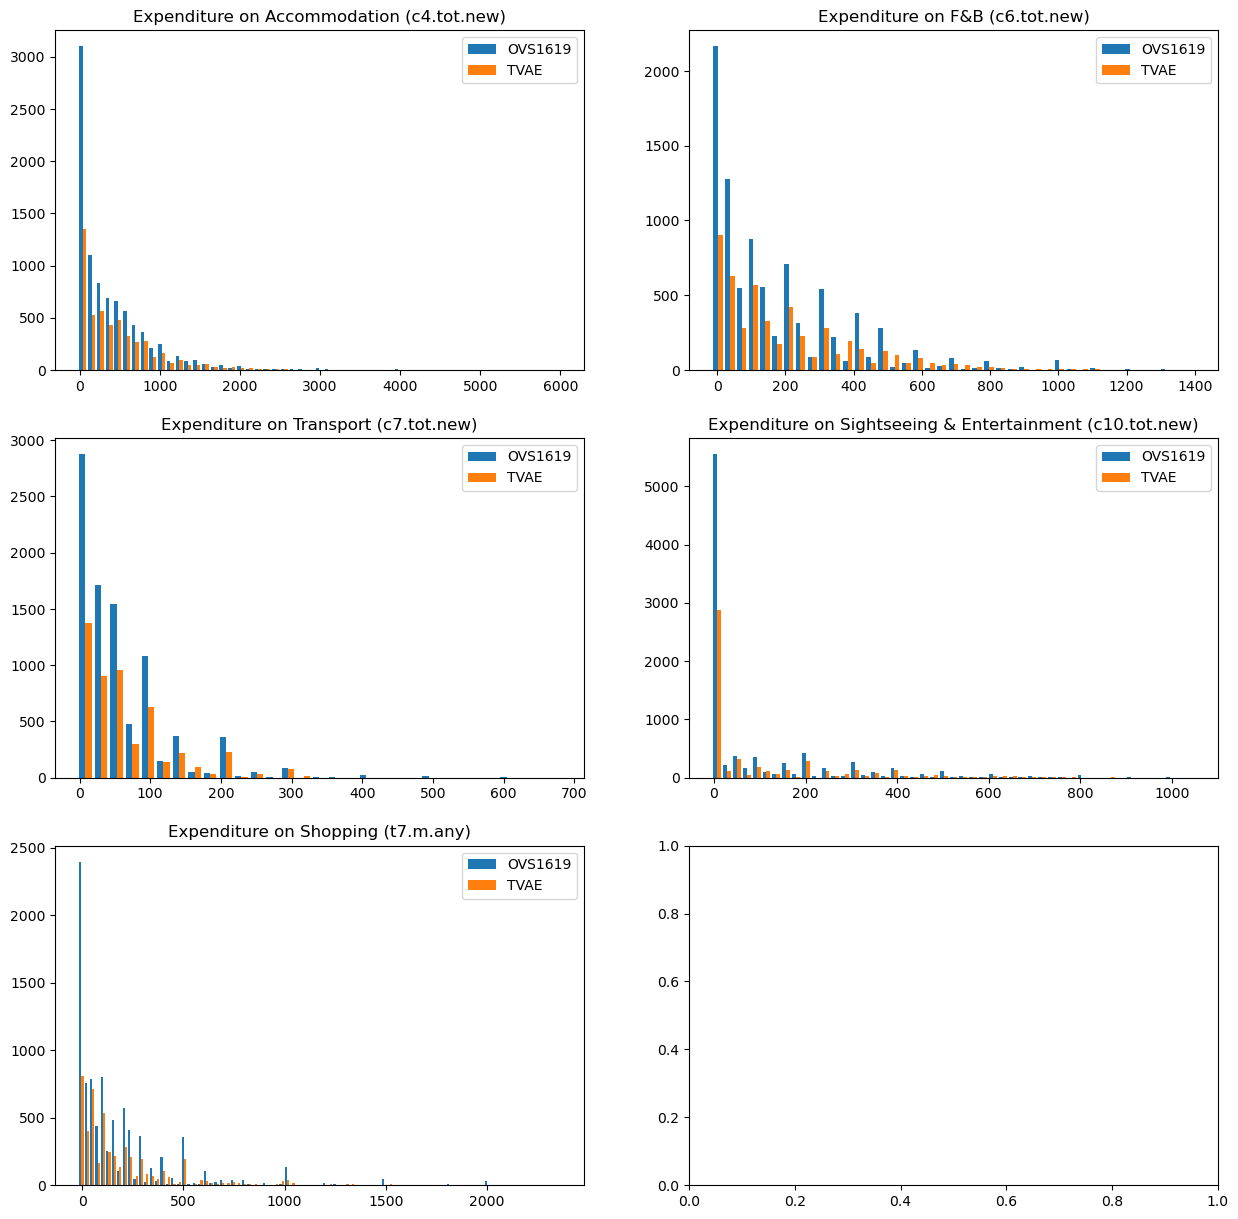

In [71]:
HistPlot([match_OVS, match_TVAE.iloc[:5000,:]], spend_categories, ["OVS1619", "TVAE"])

In [72]:
def KDEPlot(input_dfs, columns, labels, figname = "", save = False):
    '''
    FUNCTION to plot and compare KDE of different data sets.
    '''
    assert all([col in df.columns for col in columns for df in input_dfs]), "Require all columns to exist in all input dataframes."
    assert len(input_dfs) == len(labels), "Require one label per input dataframe."
    if save:
        assert len(figname) > 0, "Require non-empty string as figname to save the plot."
    
    try:
        ncols = len(columns)
        fig, axs = plt.subplots(ncols//2+1, 2, figsize = (15, 5*(ncols//2+1)))

        for ii, col in enumerate(columns):
            irow, icol = ii//2, ii-2*(ii//2)
            axs[irow, icol].set_title(col)
            for jj, df in enumerate(input_dfs):
                if len(df[col].unique()) > 5:
                    sns.kdeplot(df[col], fill = True, ax = axs[irow, icol], label = labels[jj])
            axs[irow, icol].legend();
        
        if save:
            plt.savefig(f'/home/dsml01/Ultron/Step4/figures/{figname}.png')
            plt.close()
        else:
            plt.show()
        
    except Exception as e:
        print(f"Failed to plot KDE visualizations of the data.")
        current_dateTime = str(datetime.now())[0:19]
        print(current_dateTime + ': ' + str(e))

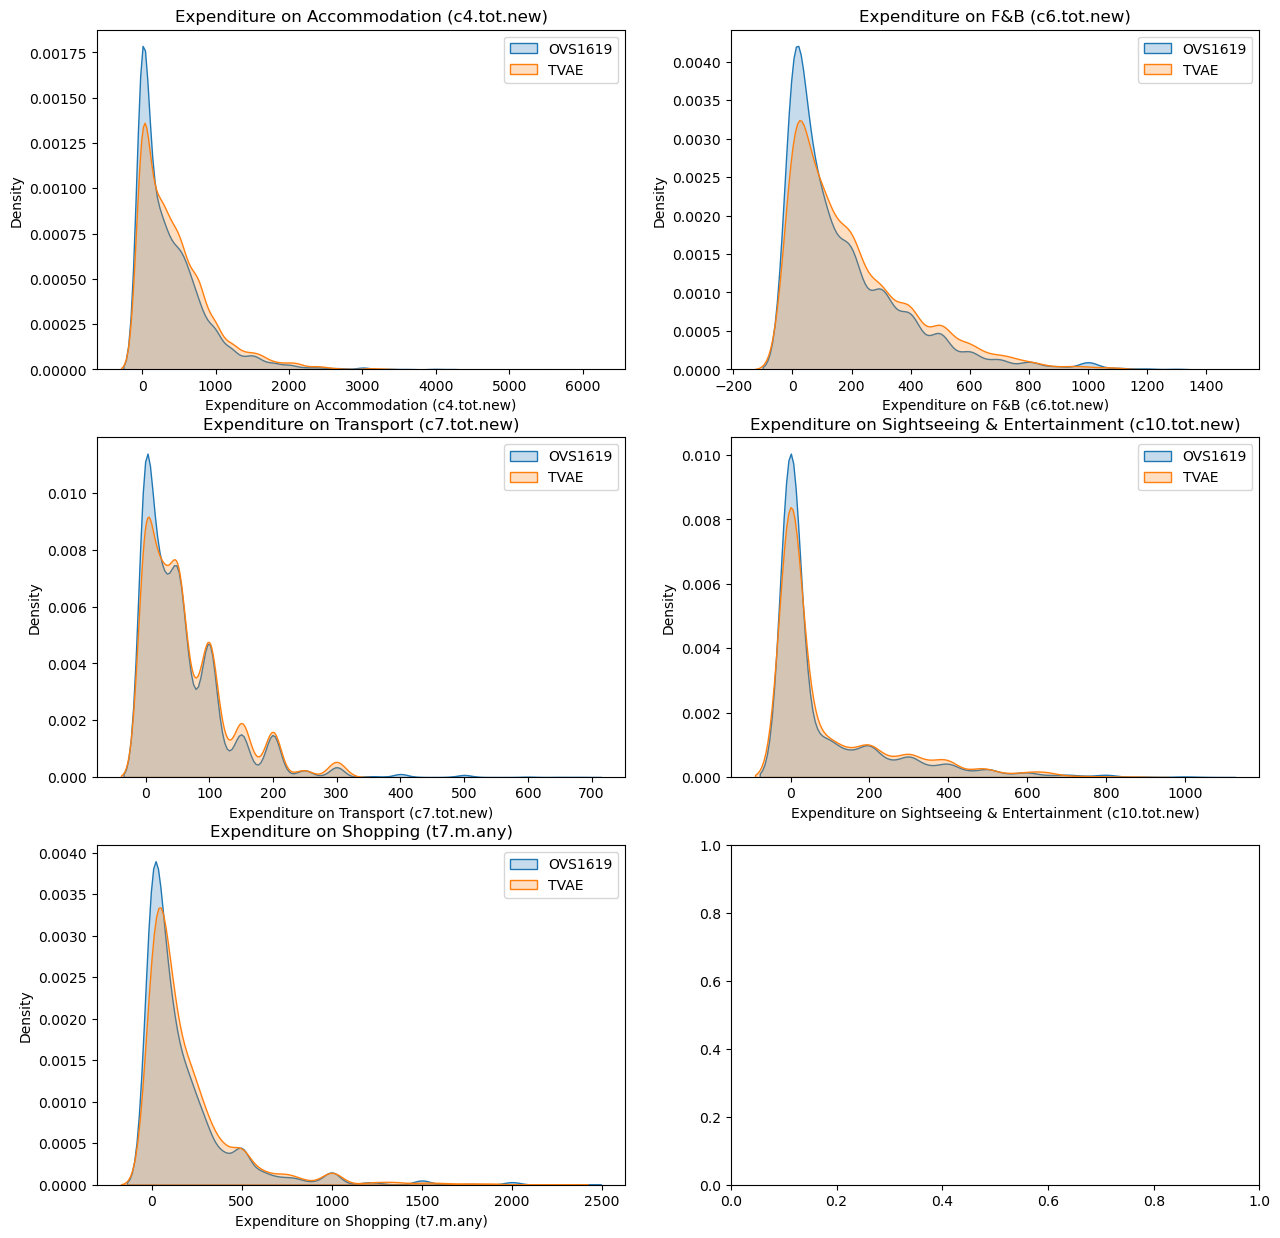

In [73]:
KDEPlot([match_OVS, match_TVAE.iloc[:5000,:]], spend_categories, ["OVS1619", "TVAE"])

In [25]:
# Make a multiple-histogram of data-sets with different length.
ax3.hist(x_multi, n_bins, histtype = 'bar')
ax3.set_title('different sample sizes')

In [32]:
filter_index = get_filter_index(OVS1619.data, value_filters)

,month,Mode of Transport (m1),a1,a4,a5,r.int1,r.int2,b1a,b1b,b2,...,b12number_3_5_cat,b12number_7_8,b12number_7_8_cat,c8b_99,c8b_1,c8b_3,c8b_5,c8b_6,c8b_7,c8b_11
38128,9,1,1,Other Nationalities,219,25,4,2,1.0,1,...,1,-1.0,1,0,1,0,1,1,0,0
